COMPLETE HOUSING DATA ANALYSIS PIPELINE

📁 STEP 1: Creating initial data file...
✅ Created 'housing.csv'

🧹 STEP 2: Cleaning data...
✅ Created 'housing_cleaned.csv'

📊 STEP 3: Starting comprehensive analysis...

1. MARKET OVERVIEW
📊 Total Properties: 20
💰 Total Market Value: Rs.12,000,000 (Rs.1.20 Crore)
🏠 Average Price: Rs.600,000 (Rs.6.00 Lakhs)
📏 Average Area: 1470 sq ft
📈 Average Price/sq ft: Rs.401

2. CITY-WISE ANALYSIS

📊 City Summary:
           Count  Avg_Price  Min_Price  Max_Price  Avg_Area  Avg_Bedrooms  \
City                                                                        
Bangalore      8   736250.0     450000    1000000    1794.0           3.0   
Hubli          6   443333.0     280000     700000    1142.0           2.0   
Mysore         6   575000.0     300000     750000    1367.0           2.0   

           Avg_Price_sqft  
City                       
Bangalore           408.0  
Hubli               380.0  
Mysore              414.0  

🏙️ Market Share:
  Bangalo

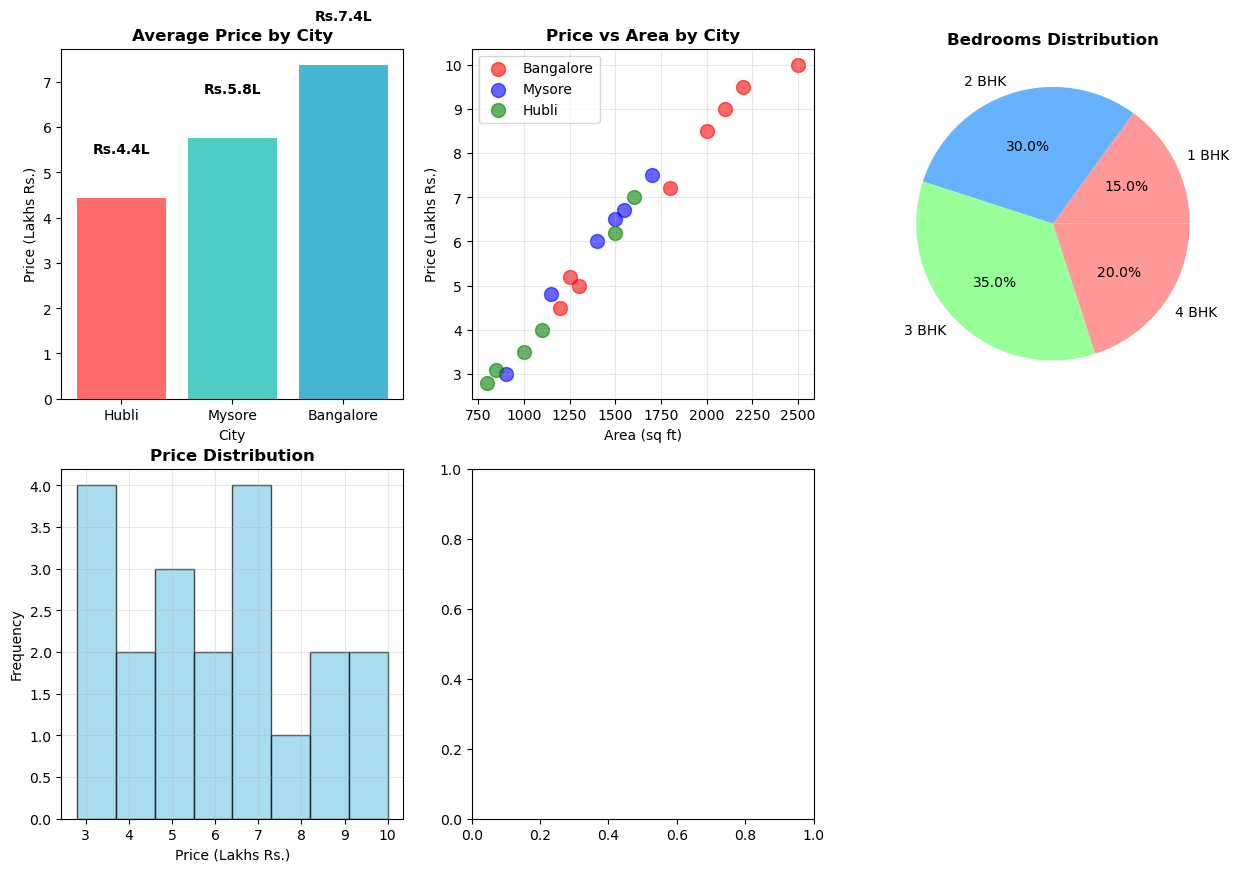

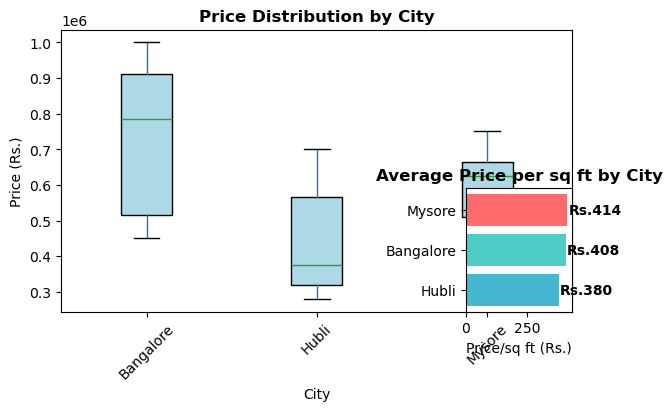

✅ Visualizations saved as 'housing_analysis.png'

9. KEY INSIGHTS & RECOMMENDATIONS

📍 LOCATION INSIGHTS:
   • Most Expensive City: Bangalore (Rs.7.4L average)
   • Best Value City: Hubli (Rs.380/sqft)
   • Most Balanced Market: Bangalore

🏠 PROPERTY INSIGHTS:
   • Most Popular: 3 BHK properties
   • Average size for 3 BHK: 1579 sq ft
   • Price range: Rs.2.8L - Rs.10.0L

💡 RECOMMENDATIONS:
   • First-time buyers: Look for 2 BHK in Hubli (Rs.4.4L average)
   • Investors: Focus on Bangalore premium segment
   • Families: 3-4 BHK in Bangalore (avg 1805 sq ft)


10. SUMMARY STATISTICS TABLE
          Metric      Value
Total Properties         20
Total Value (Cr)    Rs.1.20
   Avg Price (L)     Rs.6.0
        Avg Area 1470 sq ft
 Avg Price/sq ft     Rs.401
   Min Price (L)     Rs.2.8
   Max Price (L)    Rs.10.0
 Most Common BHK          3

✅ Analysis complete! Files created:
   • housing.csv (raw data)
   • housing_cleaned.csv (cleaned data)
   • housing_analysis.png (visualizations)
   • 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

print("="*70)
print("COMPLETE HOUSING DATA ANALYSIS PIPELINE")
print("="*70)

# Step 1: Create the initial data file
print("\n📁 STEP 1: Creating initial data file...")

data_string = """Price,City,Area,Bedrooms
450000,Bangalore,1200,2
650000,Mysore,1500,3
500000,Bangalore,1300,2
700000,Hubli,1600,3
300000,Mysore,900,1
850000,Bangalore,2000,4
400000,Hubli,1100,2
950000,Bangalore,2200,4
600000,Mysore,1400,3
1000000,Bangalore,2500,4
280000,Hubli,800,1
750000,Mysore,1700,3
520000,Bangalore,1250,2
620000,Hubli,1500,3
480000,Mysore,1150,2
900000,Bangalore,2100,4
350000,Hubli,1000,2
670000,Mysore,1550,3
720000,Bangalore,1800,3
310000,Hubli,850,1"""

with open('housing.csv', 'w', encoding='utf-8') as f:
    f.write(data_string)
print("✅ Created 'housing.csv'")

# Step 2: Clean the data and create cleaned file
print("\n🧹 STEP 2: Cleaning data...")

# Read raw data
df_raw = pd.read_csv('housing.csv')

# Clean the data
df_clean = df_raw.copy()
df_clean['City'] = df_clean['City'].str.strip().str.title()
df_clean['Price_per_sqft'] = (df_clean['Price'] / df_clean['Area']).round()

# Save cleaned data
df_clean.to_csv('housing_cleaned.csv', index=False, encoding='utf-8')
print("✅ Created 'housing_cleaned.csv'")

# Step 3: Now read the cleaned file for analysis
print("\n📊 STEP 3: Starting comprehensive analysis...")
df = pd.read_csv('housing_cleaned.csv')

# ============================================================================
# 1. MARKET OVERVIEW
# ============================================================================
print("\n" + "="*70)
print("1. MARKET OVERVIEW")
print("="*70)

total_properties = len(df)
total_value = df['Price'].sum()
avg_price = df['Price'].mean()
avg_area = df['Area'].mean()
avg_price_per_sqft = df['Price_per_sqft'].mean()

print(f"📊 Total Properties: {total_properties}")
print(f"💰 Total Market Value: Rs.{total_value:,.0f} (Rs.{total_value/10000000:.2f} Crore)")
print(f"🏠 Average Price: Rs.{avg_price:,.0f} (Rs.{avg_price/100000:.2f} Lakhs)")
print(f"📏 Average Area: {avg_area:.0f} sq ft")
print(f"📈 Average Price/sq ft: Rs.{avg_price_per_sqft:.0f}")

# ============================================================================
# 2. CITY-WISE ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("2. CITY-WISE ANALYSIS")
print("="*70)

city_analysis = df.groupby('City').agg({
    'Price': ['count', 'mean', 'min', 'max'],
    'Area': 'mean',
    'Bedrooms': 'mean',
    'Price_per_sqft': 'mean'
}).round()

city_analysis.columns = ['Count', 'Avg_Price', 'Min_Price', 'Max_Price', 
                         'Avg_Area', 'Avg_Bedrooms', 'Avg_Price_sqft']
print("\n📊 City Summary:")
print(city_analysis)

# Market share
print("\n🏙️ Market Share:")
for city in df['City'].unique():
    count = len(df[df['City'] == city])
    pct = (count/len(df))*100
    print(f"  {city}: {count} properties ({pct:.1f}%)")

# ============================================================================
# 3. PRICE DISTRIBUTION
# ============================================================================
print("\n" + "="*70)
print("3. PRICE DISTRIBUTION")
print("="*70)

# Price brackets
bins = [0, 300000, 500000, 700000, 1000000, float('inf')]
labels = ['< Rs.3L', 'Rs.3L-5L', 'Rs.5L-7L', 'Rs.7L-10L', '> Rs.10L']
df['Price_Bracket'] = pd.cut(df['Price'], bins=bins, labels=labels)

print("\n💰 Price Brackets:")
for bracket in labels:
    count = len(df[df['Price_Bracket'] == bracket])
    pct = (count/len(df))*100
    if count > 0:
        print(f"  {bracket}: {count} properties ({pct:.1f}%)")

# ============================================================================
# 4. BEDROOM ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("4. BEDROOM ANALYSIS")
print("="*70)

bedroom_stats = df.groupby('Bedrooms').agg({
    'Price': ['count', 'mean'],
    'Area': 'mean',
    'Price_per_sqft': 'mean'
}).round()

bedroom_stats.columns = ['Count', 'Avg_Price', 'Avg_Area', 'Avg_Price_sqft']
print("\n🏠 Properties by Bedroom Count:")
print(bedroom_stats)

# Most common configuration
common_bedrooms = df['Bedrooms'].mode()[0]
print(f"\n📊 Most Common: {common_bedrooms} BHK")

# ============================================================================
# 5. VALUE ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("5. VALUE ANALYSIS (Price per sq ft)")
print("="*70)

print("\n📊 Average Price/sq ft by City:")
for city in df['City'].unique():
    avg_psf = df[df['City'] == city]['Price_per_sqft'].mean()
    print(f"  {city}: Rs.{avg_psf:.0f}/sqft")

# Best and worst value
best_value = df.nsmallest(3, 'Price_per_sqft')[['City', 'Price', 'Area', 'Price_per_sqft']]
premium = df.nlargest(3, 'Price_per_sqft')[['City', 'Price', 'Area', 'Price_per_sqft']]

print("\n💎 Best Value Properties:")
print(best_value.to_string(index=False))
print("\n💰 Premium Properties:")
print(premium.to_string(index=False))

# ============================================================================
# 6. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("6. CORRELATION ANALYSIS")
print("="*70)

correlations = df[['Price', 'Area', 'Bedrooms', 'Price_per_sqft']].corr()
print("\n📊 Correlation Matrix:")
print(correlations.round(3))

print("\n🔍 Key Insights:")
print(f"  • Price vs Area: {correlations.loc['Price', 'Area']:.3f}")
print(f"  • Price vs Bedrooms: {correlations.loc['Price', 'Bedrooms']:.3f}")

# ============================================================================
# 7. STATISTICAL SUMMARY
# ============================================================================
print("\n" + "="*70)
print("7. STATISTICAL SUMMARY")
print("="*70)

print("\n📈 Price Statistics:")
print(f"  • Mean: Rs.{df['Price'].mean():,.0f}")
print(f"  • Median: Rs.{df['Price'].median():,.0f}")
print(f"  • Std Dev: Rs.{df['Price'].std():,.0f}")
print(f"  • Min: Rs.{df['Price'].min():,.0f}")
print(f"  • Max: Rs.{df['Price'].max():,.0f}")

# ============================================================================
# 8. VISUALIZATIONS
# ============================================================================
print("\n" + "="*70)
print("8. GENERATING VISUALIZATIONS")
print("="*70)

# Create visualizations
fig = plt.figure(figsize=(15, 10))

# 1. Average Price by City
plt.subplot(2, 3, 1)
city_prices = df.groupby('City')['Price'].mean().sort_values()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.bar(city_prices.index, city_prices.values/100000, color=colors[:len(city_prices)])
plt.title('Average Price by City', fontweight='bold')
plt.xlabel('City')
plt.ylabel('Price (Lakhs Rs.)')
for i, (city, price) in enumerate(city_prices.items()):
    plt.text(i, price/100000 + 1, f'Rs.{price/100000:.1f}L', ha='center', fontweight='bold')

# 2. Price vs Area Scatter
plt.subplot(2, 3, 2)
colors_map = {'Bangalore': 'red', 'Mysore': 'blue', 'Hubli': 'green'}
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Area'], city_data['Price']/100000, 
               label=city, alpha=0.6, s=100, c=colors_map.get(city, 'gray'))
plt.title('Price vs Area by City', fontweight='bold')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (Lakhs Rs.)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Bedrooms Distribution
plt.subplot(2, 3, 3)
bedroom_counts = df['Bedrooms'].value_counts().sort_index()
plt.pie(bedroom_counts.values, labels=[f'{b} BHK' for b in bedroom_counts.index],
        autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Bedrooms Distribution', fontweight='bold')

# 4. Price Histogram
plt.subplot(2, 3, 4)
plt.hist(df['Price']/100000, bins=8, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Price Distribution', fontweight='bold')
plt.xlabel('Price (Lakhs Rs.)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 5. Box Plot by City
plt.subplot(2, 3, 5)
df.boxplot(column='Price', by='City', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'))
plt.title('Price Distribution by City', fontweight='bold')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Price (Rs.)')
plt.xticks(rotation=45)

# 6. Price per sq ft by City
plt.subplot(2, 3, 6)
psf_by_city = df.groupby('City')['Price_per_sqft'].mean().sort_values()
plt.barh(psf_by_city.index, psf_by_city.values, color=['#45B7D1', '#4ECDC4', '#FF6B6B'])
plt.title('Average Price per sq ft by City', fontweight='bold')
plt.xlabel('Price/sq ft (Rs.)')
for i, (city, psf) in enumerate(psf_by_city.items()):
    plt.text(psf + 5, i, f'Rs.{psf:.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('housing_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualizations saved as 'housing_analysis.png'")

# ============================================================================
# 9. KEY INSIGHTS
# ============================================================================
print("\n" + "="*70)
print("9. KEY INSIGHTS & RECOMMENDATIONS")
print("="*70)

# Find city with highest avg price
highest_price_city = df.groupby('City')['Price'].mean().idxmax()
highest_price_value = df.groupby('City')['Price'].mean().max()

# Find city with best value (lowest price/sq ft)
best_value_city = df.groupby('City')['Price_per_sqft'].mean().idxmin()
best_value_psf = df.groupby('City')['Price_per_sqft'].mean().min()

print(f"""
📍 LOCATION INSIGHTS:
   • Most Expensive City: {highest_price_city} (Rs.{highest_price_value/100000:.1f}L average)
   • Best Value City: {best_value_city} (Rs.{best_value_psf:.0f}/sqft)
   • Most Balanced Market: {df['City'].mode()[0]}

🏠 PROPERTY INSIGHTS:
   • Most Popular: {common_bedrooms} BHK properties
   • Average size for {common_bedrooms} BHK: {df[df['Bedrooms']==common_bedrooms]['Area'].mean():.0f} sq ft
   • Price range: Rs.{df['Price'].min()/100000:.1f}L - Rs.{df['Price'].max()/100000:.1f}L

💡 RECOMMENDATIONS:
   • First-time buyers: Look for 2 BHK in {best_value_city} (Rs.{df[df['City']==best_value_city]['Price'].mean()/100000:.1f}L average)
   • Investors: Focus on {highest_price_city} premium segment
   • Families: 3-4 BHK in {df[df['Bedrooms']>=3]['City'].mode()[0]} (avg {df[df['Bedrooms']>=3]['Area'].mean():.0f} sq ft)
""")

# ============================================================================
# 10. SUMMARY STATISTICS TABLE
# ============================================================================
print("\n" + "="*70)
print("10. SUMMARY STATISTICS TABLE")
print("="*70)

summary_table = pd.DataFrame({
    'Metric': ['Total Properties', 'Total Value (Cr)', 'Avg Price (L)', 'Avg Area', 'Avg Price/sq ft',
               'Min Price (L)', 'Max Price (L)', 'Most Common BHK'],
    'Value': [
        f"{len(df)}",
        f"Rs.{total_value/10000000:.2f}",
        f"Rs.{avg_price/100000:.1f}",
        f"{avg_area:.0f} sq ft",
        f"Rs.{avg_price_per_sqft:.0f}",
        f"Rs.{df['Price'].min()/100000:.1f}",
        f"Rs.{df['Price'].max()/100000:.1f}",
        f"{common_bedrooms}"
    ]
})
print(summary_table.to_string(index=False))

# Save summary to file with UTF-8 encoding
with open('housing_analysis_summary.txt', 'w', encoding='utf-8') as f:
    f.write("HOUSING DATA ANALYSIS SUMMARY\n")
    f.write("="*50 + "\n")
    f.write(f"Total Properties: {len(df)}\n")
    f.write(f"Total Market Value: Rs.{total_value/10000000:.2f} Crore\n")
    f.write(f"Average Price: Rs.{avg_price/100000:.1f} Lakhs\n")
    f.write(f"Average Area: {avg_area:.0f} sq ft\n")
    f.write(f"Average Price/sq ft: Rs.{avg_price_per_sqft:.0f}\n\n")
    
    f.write("CITY WISE SUMMARY:\n")
    f.write("-"*30 + "\n")
    for city in df['City'].unique():
        city_data = df[df['City'] == city]
        f.write(f"{city}:\n")
        f.write(f"  Properties: {len(city_data)}\n")
        f.write(f"  Avg Price: Rs.{city_data['Price'].mean()/100000:.1f}L\n")
        f.write(f"  Avg Area: {city_data['Area'].mean():.0f} sq ft\n")
        f.write(f"  Avg Price/sq ft: Rs.{city_data['Price_per_sqft'].mean():.0f}\n\n")

print("\n✅ Analysis complete! Files created:")
print("   • housing.csv (raw data)")
print("   • housing_cleaned.csv (cleaned data)")
print("   • housing_analysis.png (visualizations)")
print("   • housing_analysis_summary.txt (summary report)")

# Display sample of cleaned data
print("\n" + "="*70)
print("SAMPLE OF CLEANED DATA")
print("="*70)
print(df.head(10).to_string(index=False))
